In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

# Exploratory Data Analysis


In [3]:
print('Head of data:', train.head())
print('Decscription of Data:',train.describe())

Head of data:    id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  


In [4]:
#check for missing values
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


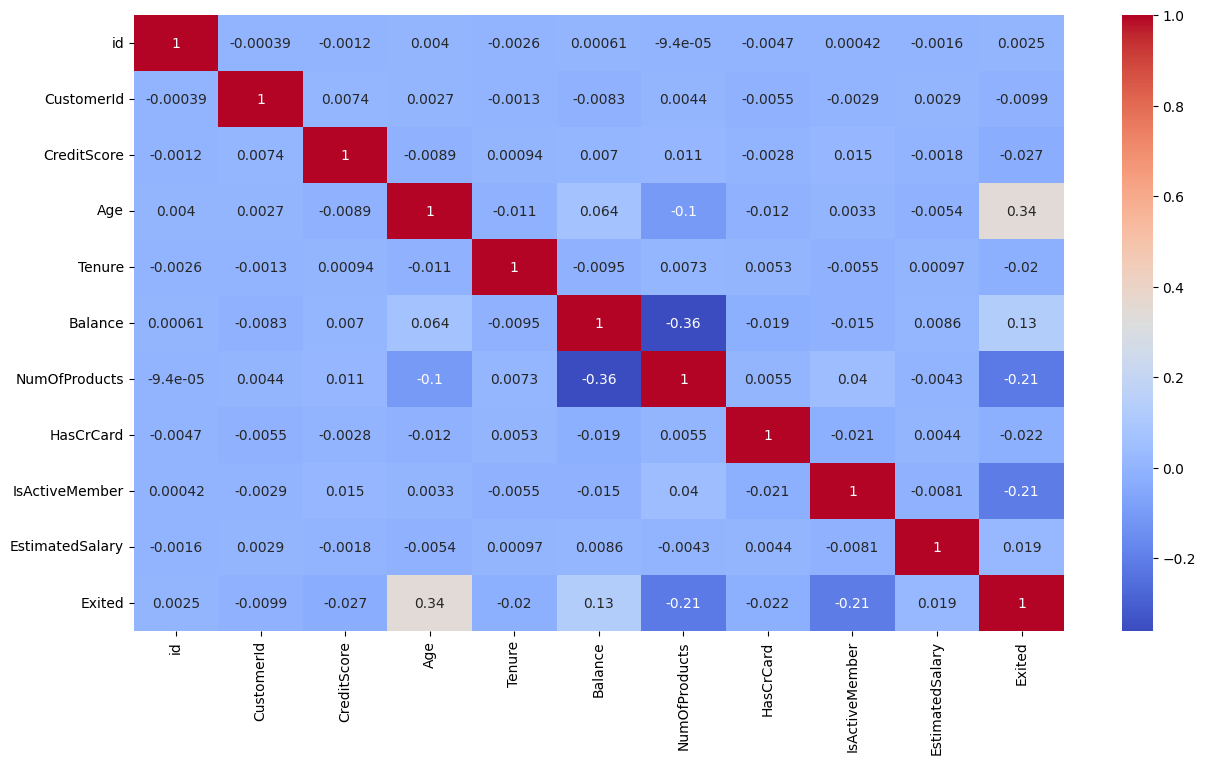

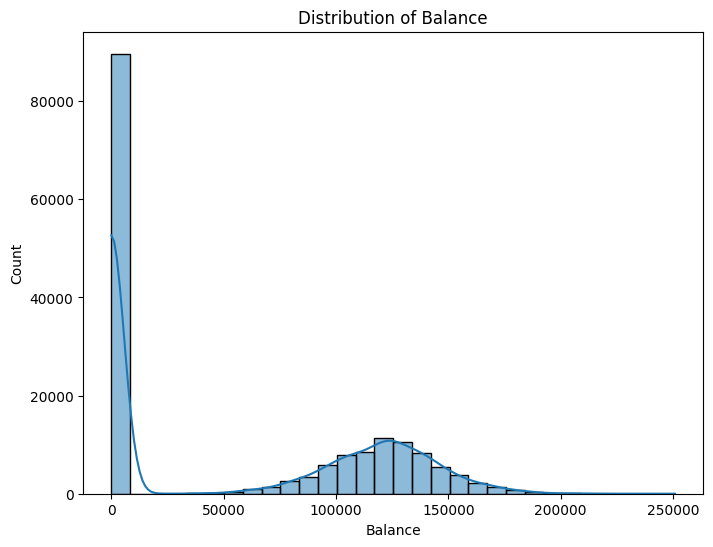

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


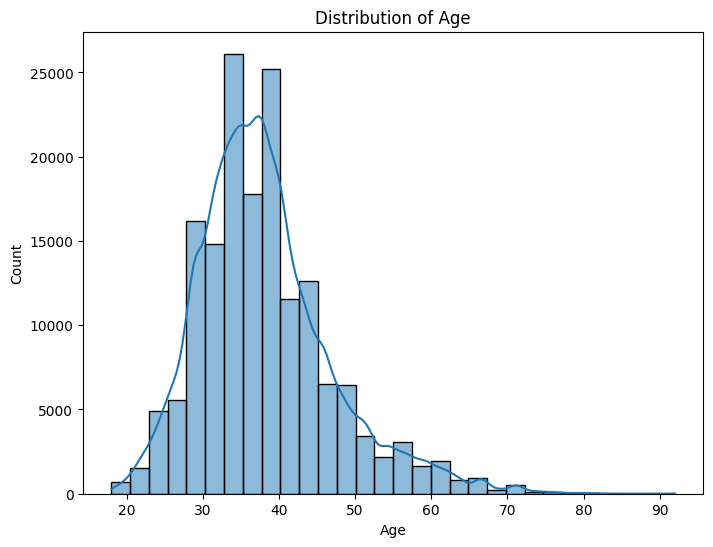

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


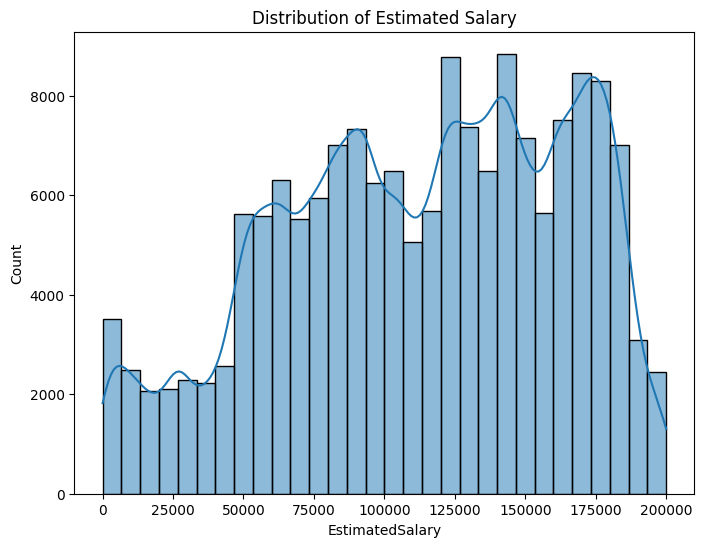

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


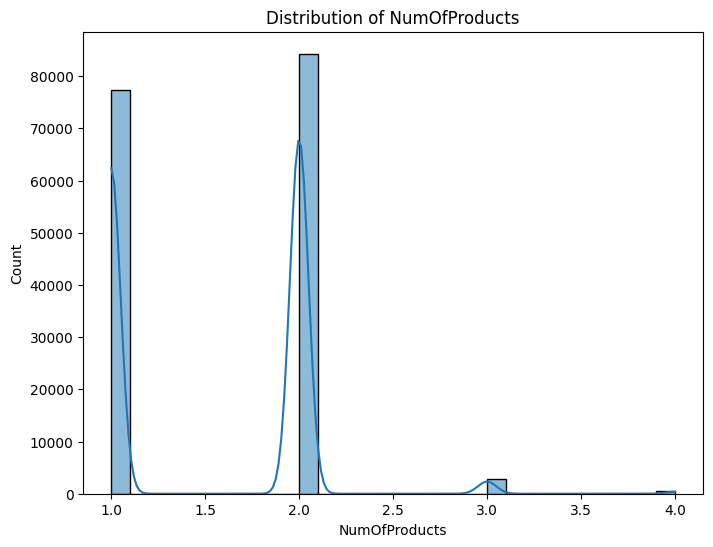

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(15,8))
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot= True,cmap = 'coolwarm')
plt.show

# Distribution plot for 'Balance'
plt.figure(figsize=(8,6))
sns.histplot(train['Balance'],kde = True,bins=30)
plt.title('Distribution of Balance')
plt.show()

# Distribution plot for 'Age'
plt.figure(figsize=(8,6))
sns.histplot(train['Age'],kde = True,bins=30)
plt.title('Distribution of Age')
plt.show()

# Distribution plot for Estimated Salary
plt.figure(figsize=(8,6))
sns.histplot(train['EstimatedSalary'],kde = True,bins=30)
plt.title('Distribution of Estimated Salary')
plt.show()

#Number of products
plt.figure(figsize=(8,6))
sns.histplot(train['NumOfProducts'],kde = True,bins=30)
plt.title('Distribution of NumOfProducts')
plt.show()

Now that we viewed the distibution of some of the numerical features. We now need to look for outliers in our data.

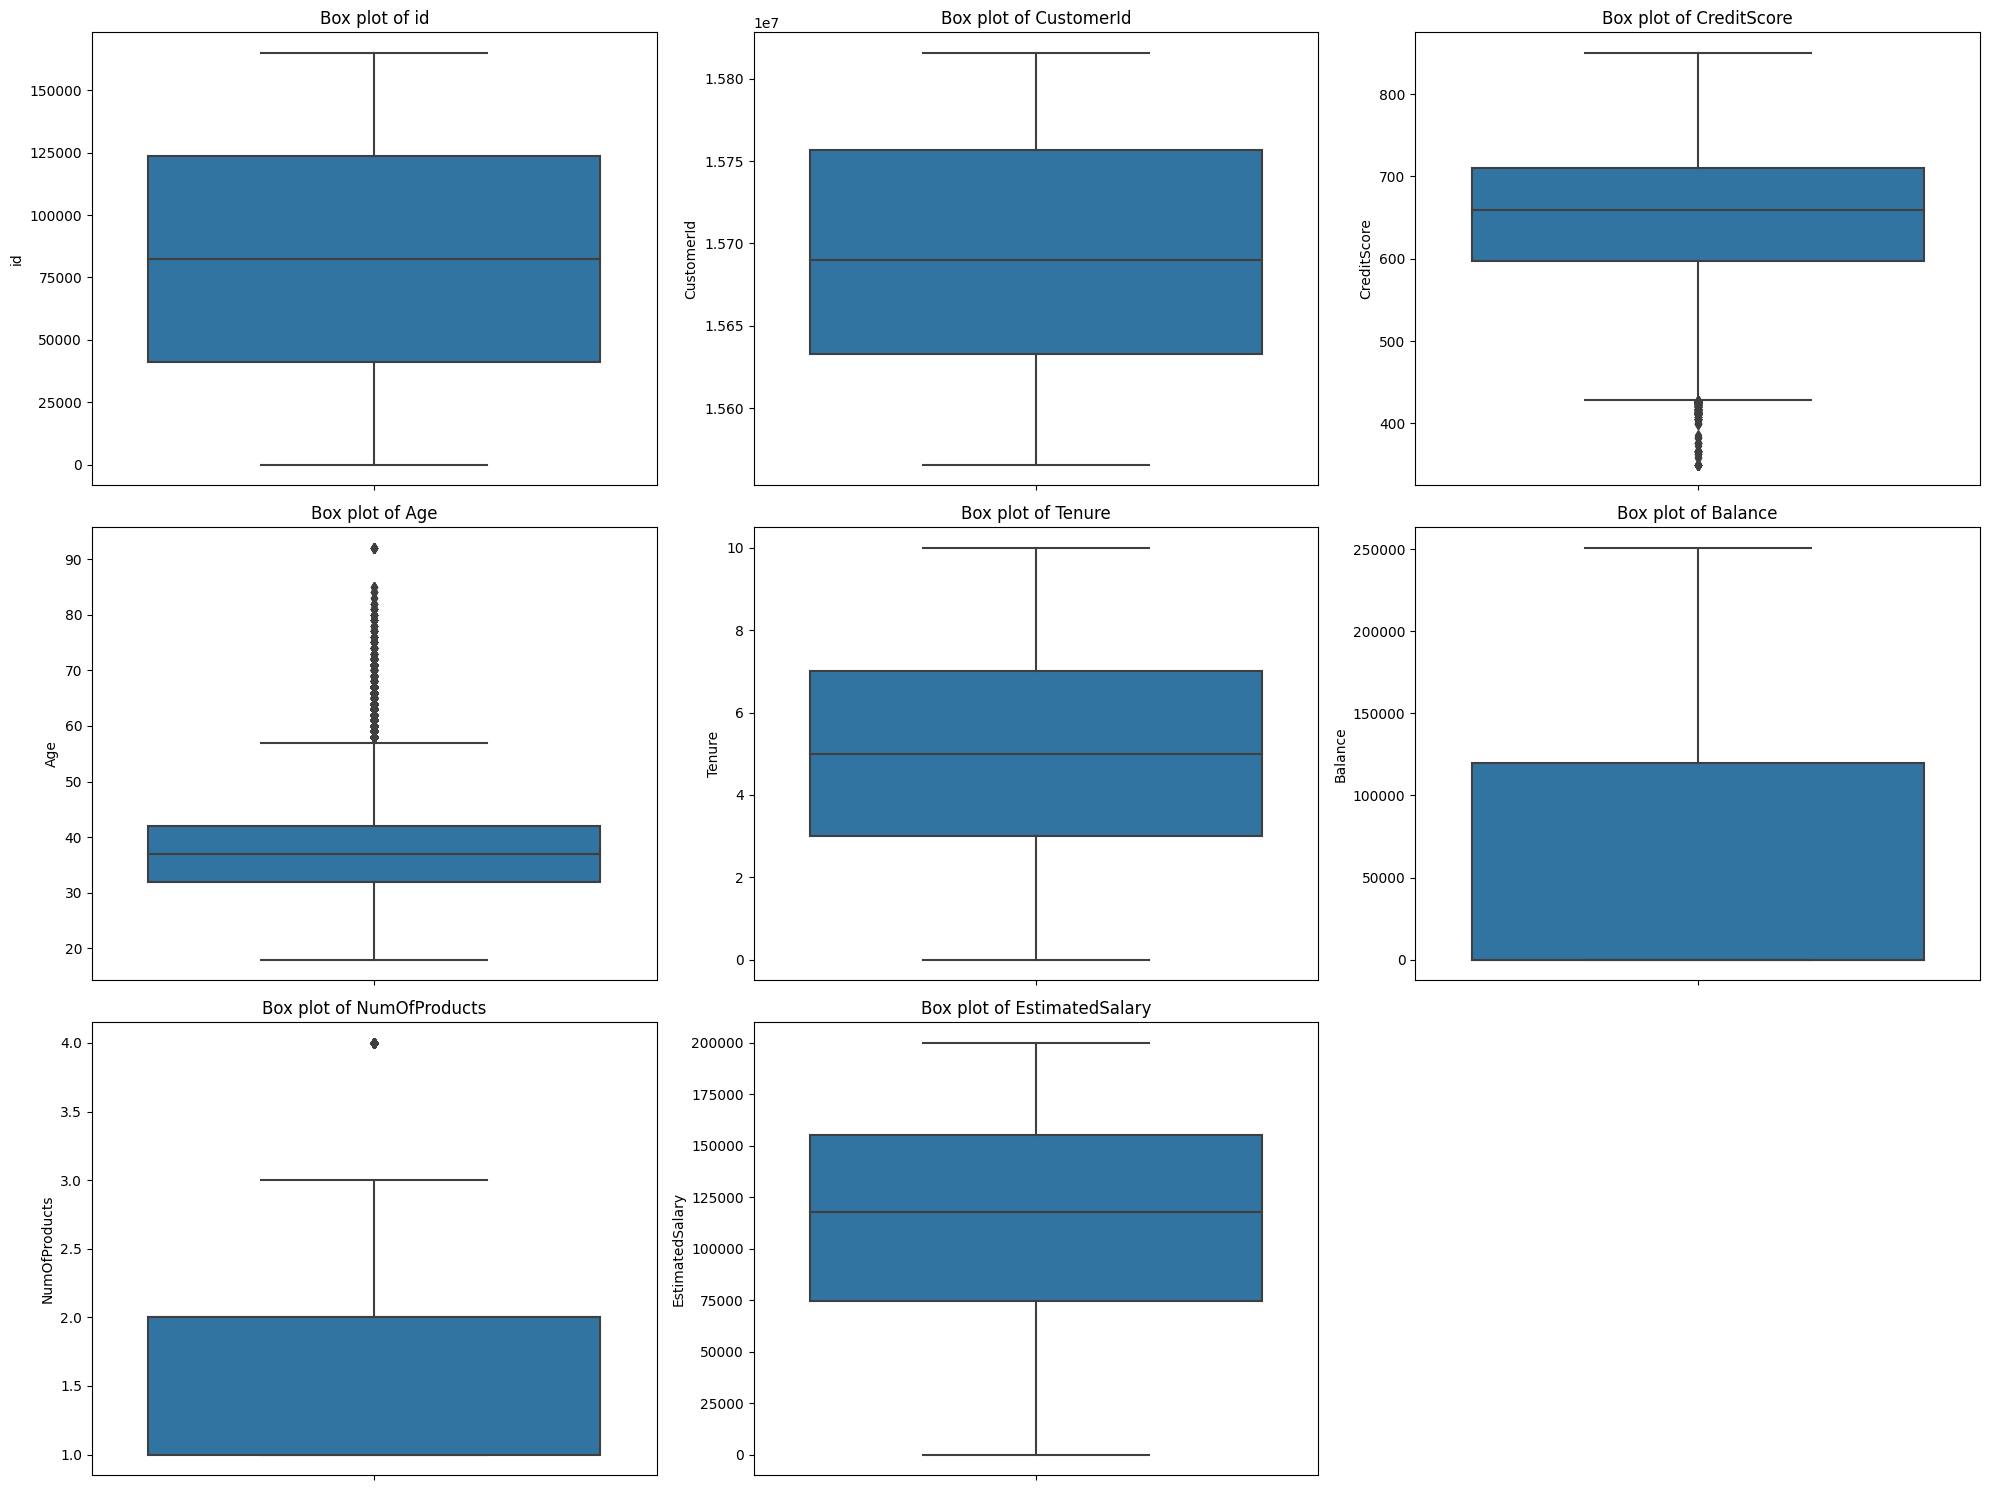

In [6]:
#numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in train.select_dtypes(include=['int64', 'float64']).columns if col not in ['Exited', 'HasCrCard','IsActiveMember']]


plt.figure(figsize=(20, 15)) # Adjust the size as necessary
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1,3, i)
    sns.boxplot(y=train[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

**Distribution of the classes in the target variable**

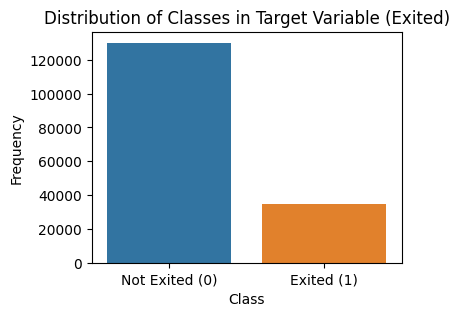

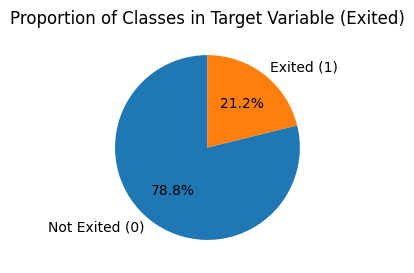

In [7]:
# Count the occurrences of each class
class_counts = train['Exited'].value_counts()

#Create a bar plot
plt.figure(figsize=(4,3))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Classes in Target Variable (Exited)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(len(class_counts)), ['Not Exited (0)', 'Exited (1)'])  # Assuming 0 and 1 are your class labels
plt.show()

#Same data as a pie chart 
plt.figure(figsize=(4,3))
plt.pie(class_counts, labels=['Not Exited (0)', 'Exited (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Classes in Target Variable (Exited)')  # Add a title to the pie chart
plt.show()

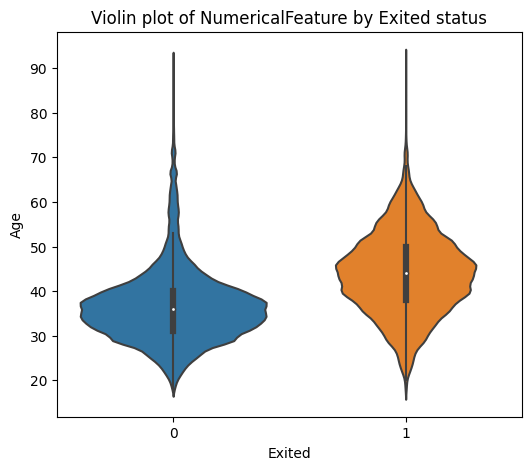

<function matplotlib.pyplot.show(close=None, block=None)>

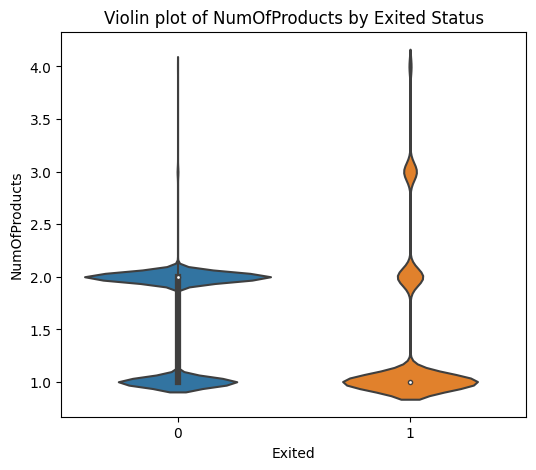

In [8]:
#plot violin plot for age
plt.figure(figsize=(6, 5))
sns.violinplot(x='Exited', y='Age', data=train)
plt.title('Violin plot of NumericalFeature by Exited status')
plt.xlabel('Exited')
plt.ylabel('Age')  # replace with the actual feature name
plt.show()

plt.figure(figsize=(6,5))
sns.violinplot(x='Exited', y ='NumOfProducts',data = train )
plt.title('Violin plot of NumOfProducts by Exited Status')
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.show

**Onehot encoding catergorical features on training set**

Here's where we encode categorical variables so we perform further EDA on the transformed features.



In [9]:
#Encode geography features 
encoded_countries = pd.get_dummies(train['Geography'], prefix = 'Country')
encoded_gender = pd.get_dummies(train['Gender'],drop_first = True)

encoded_features = pd.concat([encoded_countries ,encoded_gender], axis = 1)

#Joined encoded features to main dataset
train = train.join(encoded_features)

#drop original features
train = train.drop('Geography',axis =1)
train = train.drop('Gender',axis = 1)

#Drop unnessecary features
train = train.drop('id',axis = 1)
train = train.drop('Surname', axis = 1)

In [10]:
#encoded_features

In [11]:
#train.head()

**Onehot encoding catergorical features on training set**

In [12]:
#Encode geography features 
encoded_test_countries = pd.get_dummies(test['Geography'], prefix = 'Country')
encoded_test_gender = pd.get_dummies(test['Gender'],drop_first = True)

encoded_test_features = pd.concat([encoded_test_countries ,encoded_test_gender], axis = 1)

#Joined encoded features to main dataset
test = test.join(encoded_test_features)

#drop original features
test = test.drop('Geography',axis =1)
test = test.drop('Gender',axis = 1)

#save 'id' variable from test dataset
test_ids = test['id'].copy()

#Drop unnessecary features
test = test.drop(['id','Surname'],axis = 1)


**Further EDA on encoded features** <br>
Now that we've encoded the variables. We can now perform further exploratory data analysis on them. 

<function matplotlib.pyplot.show(close=None, block=None)>

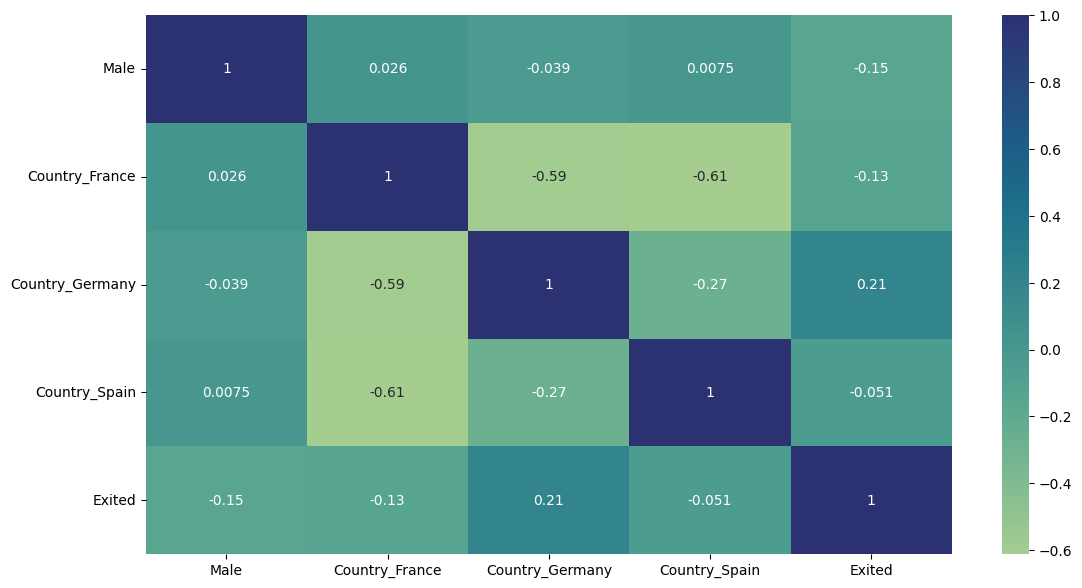

In [13]:
# Correlation heatmap
"""plt.figure(figsize=(15,8))
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot= True,cmap = 'coolwarm')
plt.show"""

encoded_features = train[['Male','Country_France','Country_Germany','Country_Spain','Exited']]
correlation_matrix = encoded_features.corr(numeric_only = True)

plt.figure(figsize=(13,7))
sns.heatmap(correlation_matrix,annot = True,cmap = 'crest')
plt.show

**Balance the target variable**

In [14]:
from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
X = train.drop('Exited', axis=1)
y = train['Exited']

In [15]:
# Initialize the SMOTE object
smote = SMOTE()

# Resample the training dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


# Check the new class distribution
print("y resampled:",y_resampled.value_counts())
print("x resampled:",X_resampled.value_counts())

y resampled: Exited
0    130113
1    130113
Name: count, dtype: int64
x resampled: CustomerId  CreditScore  Age   Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Country_France  Country_Germany  Country_Spain  Male 
15613197    590          40.0  8       118079.47  1              1.0        0.0             62933.03         False           True             False          True     6
15794137    751          37.0  0       151218.98  1              1.0        1.0             109309.29        False           True             False          False    5
15762708    619          38.0  10      119658.49  1              1.0        1.0             8646.58          False           False            True           False    4
15752809    702          43.0  6       116121.67  1              1.0        0.0             61602.42         False           False            True           True     4
15631054    625          24.0  1       0.00       1              1.0        1.0   

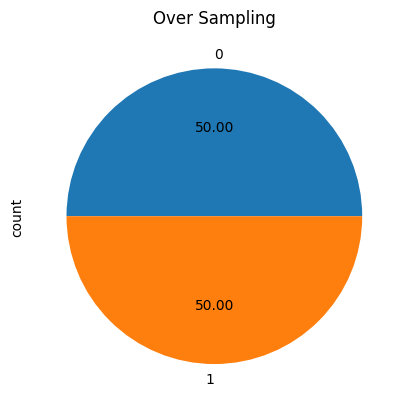

In [16]:
pie = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = pie.set_title("Over Sampling")

#ask ChatGPT to explain this code, Why does suing y_resampled variable in Pie chart plot also show x_resampled 

**Standardising the dataset**<br>
standardising data in a dataset is important because it can heavily influence the deciscions and weighting of a machine learning model. In the case of Neural Networks, data with a wide range of values can provide bias to the gradient descent. <br>

When transforming the test dataset, it's important to use `scaler.transform` and not `scaler.fit_transform`. This is to ensures that the standardisation of the test data is based on the training dataset distibution; meaning that no data from the test data is leaked into the training set.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_resampled)

#Transform the testdatset
test_scaled = scaler.transform(test)


Verify and check that the features have been standardised

In [18]:
print("Mean of standardised features:",np.mean(X_standardized,axis = 0))
print("Standard Deviation of features:",np.std(X_standardized,axis =0))

print("Mean of standardised features:",np.mean(test_scaled,axis = 0))
print("Standard Deviation of features:",np.std(test_scaled,axis =0))

Mean of standardised features: [ 1.02926112e-14  3.31808325e-16  3.68724459e-16 -6.55315981e-17
  1.39800743e-17  3.47754347e-16  2.80038363e-16  1.24073159e-16
 -1.70928252e-17  4.36877321e-17  1.04850557e-16 -3.49501857e-17
 -4.19402228e-17]
Standard Deviation of features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of standardised features: [ 0.00787937  0.02321771 -0.24226392  0.06611856 -0.09209456  0.28290048
  0.01323212  0.15287059 -0.01743091 -0.03779401 -0.23208688 -0.08409299
 -0.07984436]
Standard Deviation of features: [0.99985289 1.06369571 1.00514185 1.05978854 0.99410975 1.01968523
 1.06052948 1.06764116 0.9984911  1.00639843 0.87345724 0.94755214
 1.01337354]


Convert standardized NP array back into a pandas dataframe

In [19]:
# Assuming the columns of X are the feature names
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
#print(X_standardized_df.head())
X_standardized_df.head(20)

test_df = pd.DataFrame(test_scaled, columns = X.columns)
test_df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Male
0,1.148840,-0.910895,-1.957543,-1.065616,-0.968177,1.119073,-1.838685,1.230740,0.948982,0.828919,-0.680378,-0.583430,-1.230050
1,1.267676,0.373777,0.651297,-1.065616,-0.968177,-0.752902,0.620561,-0.904639,-0.807176,0.828919,-0.680378,-0.583430,-1.230050
2,1.612218,0.016188,-0.709837,0.822725,-0.968177,1.119073,0.620561,-0.904639,0.510185,0.828919,-0.680378,-0.583430,-1.230050
3,1.637115,0.347289,-0.482981,1.200394,-0.968177,-0.752902,0.620561,-0.904639,0.014671,0.828919,-0.680378,-0.583430,0.812975
4,-1.174663,1.287616,-0.256125,1.955730,0.951758,-0.752902,0.620561,-0.904639,0.521086,-1.206391,1.469772,-0.583430,0.812975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,-0.410637,-1.122799,-1.276976,0.822725,0.870001,-0.752902,0.620561,1.230740,0.693006,-1.206391,-0.680378,1.714003,0.812975
110019,1.152117,-1.056579,-0.482981,-0.310280,1.850565,-0.752902,0.620561,1.230740,-1.410272,0.828919,-0.680378,-0.583430,-1.230050
110020,0.515018,0.757854,-1.050120,-1.065616,-0.968177,1.119073,0.620561,-0.904639,-1.924530,0.828919,-0.680378,-0.583430,0.812975
110021,-0.055662,0.718122,-0.936692,-0.687948,-0.968177,-0.752902,0.620561,1.230740,0.906081,0.828919,-0.680378,-0.583430,-1.230050


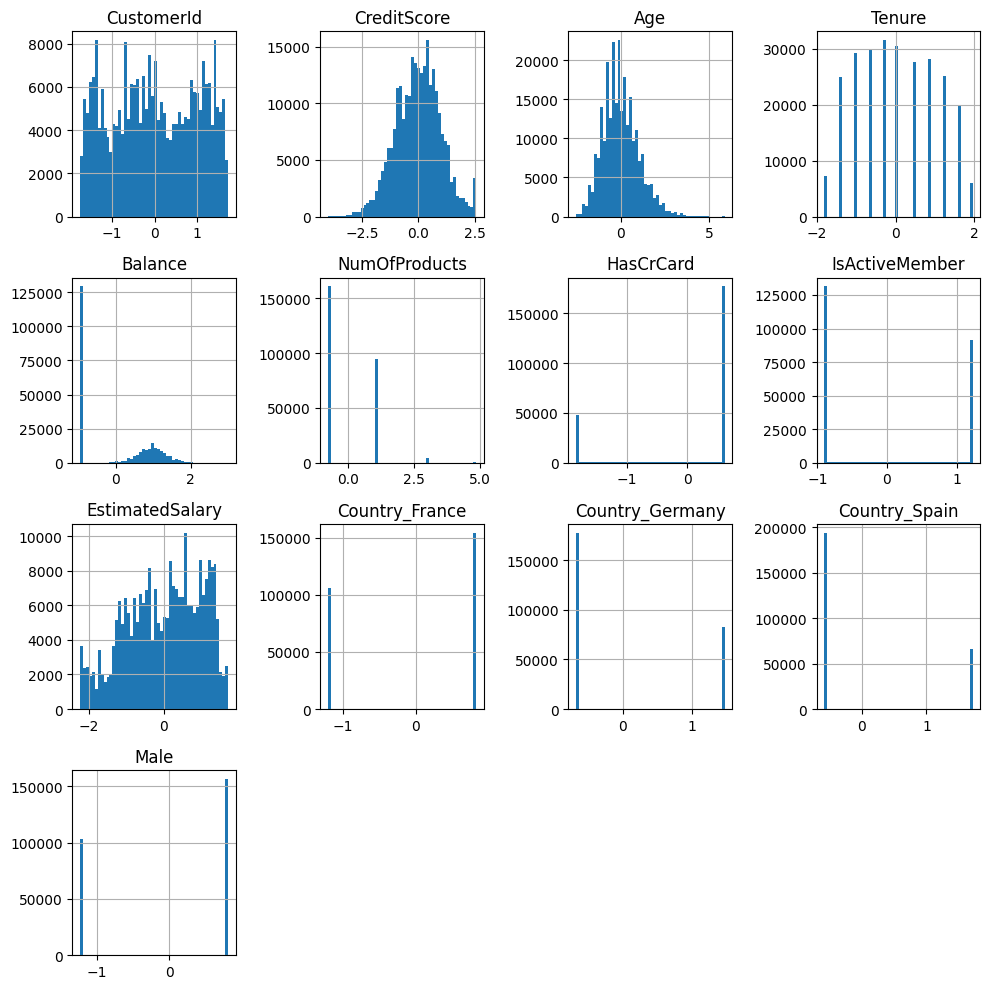

In [20]:
X_standardized_df.hist(figsize=(10, 10), bins=50)
plt.tight_layout()
plt.show()

# Creating the model

Split the dataset in training and test data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y_resampled, test_size=0.2, random_state=42)


Convert to Pytorch tensors

In [22]:
import torch


X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).view(-1, 1)


#convert test Dataframe into torch tensor
test_tensor = torch.tensor(test_df.values.astype(np.float32))

Preparing the data with data loader


In [23]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


Create Pytorch dataset instances

In [24]:
train_dataset  = CustomDataset(X_train_tensor, y_train_tensor)
validation_dataset = CustomDataset(X_test_tensor, y_test_tensor)

Create Dataloader instances 

In [25]:
batch_size = 64

train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True,num_workers = 2)
validation_loader = DataLoader(dataset = validation_dataset, batch_size = batch_size, shuffle = True, num_workers = 2)

# Define the Network Architechture

In [26]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [27]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(13, 1024),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

Create instance of *NeuralNetwork* and move it to the device

In [28]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=13, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=1, bias=True)
  )
)


In [29]:
# Define Hyperparameters
batch_size = 512
num_epochs = 45
learning_rate = 0.02

In [30]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
#Define the loss function
loss_fn = nn.BCEWithLogitsLoss()

The optimisation process happens in 3 steps in the training loop. 
1. Call *optimizer.zero_grad()* to reset all the gradients on all parameters. The gradients add up, after each loops, so we have to zero them to stop them adding up. 
2. Back propagate the prediction loss with a call to *loss.backwards()*PyTorch deposits the gradients of the loss w.r.t. each parameter
3. *optimizer.step()* is used to adjust parameters with by the gradients collected in the *backwards()* pass call

In [32]:
train_losses = []
test_losses = []

all_pred_labels = []
all_true_labels = []

#Train loop
def train_loop(dataloader,model, loss_fn,optimizer):
    
    total_loss = 0
    total_count = 0
    
    size = len(dataloader.dataset)
    
    model.train()
    for batch,(X,y) in enumerate(dataloader):
        #move device to same device as the model
        X, y = X.to(device), y.to(device)
       
        
        #Backpropagation 
        optimizer.zero_grad()
         #Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred,y)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * X.size(0)
        total_count += X.size(0)
        
        if batch % 100 == 0:
            loss, current =  loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
    average_loss = total_loss / total_count
    train_losses.append(average_loss)
            
#Test loop
def test_loop(dataloader, model, loss_fn):
   
    total_loss = 0
    total_count = 0
    
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss , correct = 0 , 0
    
    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True

    with torch.no_grad():
        for X, y in dataloader:
            #Move data to same device as the model 
            X, y = X.to(device), y.to(device)
            pred = model(X)
            
            if y.dim() == 1:
                y = y.unsqueeze(1)  # Adjust only if necessary
           
            loss = loss_fn(pred, y)  # Correct usage of loss
            total_loss += loss.item() * X.size(0)  # Correctly accumulate total loss
            total_count += X.size(0)
            
            pred_labels = torch.sigmoid(pred) > 0.5
            correct += (pred_labels == y).type(torch.float).sum().item()
            
            #Used to calculated the f1 score by storing all predicted and true labels in an array
            all_pred_labels.append(pred_labels.cpu())
            all_true_labels.append(y.cpu())
        
    average_loss = total_loss / total_count
    test_losses.append(average_loss)
  
    print(f"Test Error: \n Accuracy: {(100*correct/total_count):>0.1f}%, Avg loss: {average_loss:>8f} \n")
    


With the training and test loops defined. We can now feed in the input data in the model via the training loop, and validate on the test loop

**Testing the model on the validation set**

In [33]:
for t in range(num_epochs):        
    print(f"Epoch{t+1}\n--------------------------")
    train_loop(train_loader,model,loss_fn,optimizer)
    test_loop(validation_loader,model,loss_fn)
    
print("Done")

# Concatenate the results from the list to a single tensor. This is performed outside the test loop after the last epoch 
#to ensure that all results are stored in the tensor
all_pred_labels = torch.cat(all_pred_labels).squeeze(-1)
all_true_labels = torch.cat(all_true_labels).squeeze(-1)

Epoch1
--------------------------
loss: 0.700864  [   64/208180]
loss: 0.580365  [51264/208180]
loss: 0.528242  [102464/208180]
loss: 0.448505  [153664/208180]
loss: 0.490201  [204864/208180]
loss: 0.417822  [256064/208180]
loss: 0.359453  [307264/208180]
loss: 0.401507  [358464/208180]
loss: 0.286216  [409664/208180]
loss: 0.332852  [460864/208180]
loss: 0.486311  [512064/208180]
loss: 0.397946  [563264/208180]
loss: 0.390575  [614464/208180]
loss: 0.250583  [665664/208180]
loss: 0.382266  [716864/208180]
loss: 0.323406  [768064/208180]
loss: 0.535589  [819264/208180]
loss: 0.333204  [870464/208180]
loss: 0.313641  [921664/208180]
loss: 0.307214  [972864/208180]
loss: 0.338711  [1024064/208180]
loss: 0.338878  [1075264/208180]
loss: 0.305513  [1126464/208180]
loss: 0.384573  [1177664/208180]
loss: 0.339360  [1228864/208180]
loss: 0.315317  [1280064/208180]
loss: 0.284516  [1331264/208180]
loss: 0.351685  [1382464/208180]
loss: 0.323393  [1433664/208180]
loss: 0.458199  [1484864/208180

**Testing the model on the test dataset**

In [34]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_tensor = test_tensor.to(device)
    predictions_logits = model(test_tensor)
    predictions_prob = torch.sigmoid(predictions_logits)
    predictions = (predictions_prob > 0.5).float()  # Convert probabilities to binary predictions

In [35]:
predictions

tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], device='cuda:0')

Display the predictions

In [36]:
# Convert the predictions tensor to a Pandas DataFrame
predictions_df = pd.DataFrame(predictions.cpu().numpy(), columns=['Predictions'])

# Display the first few rows of the DataFrame
predictions_df.head(30)

,Predictions
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,0.0


In [37]:
#convert predictions to numpy array
predictions_np = predictions.cpu().numpy().flatten()

# Evaluation of Base Model

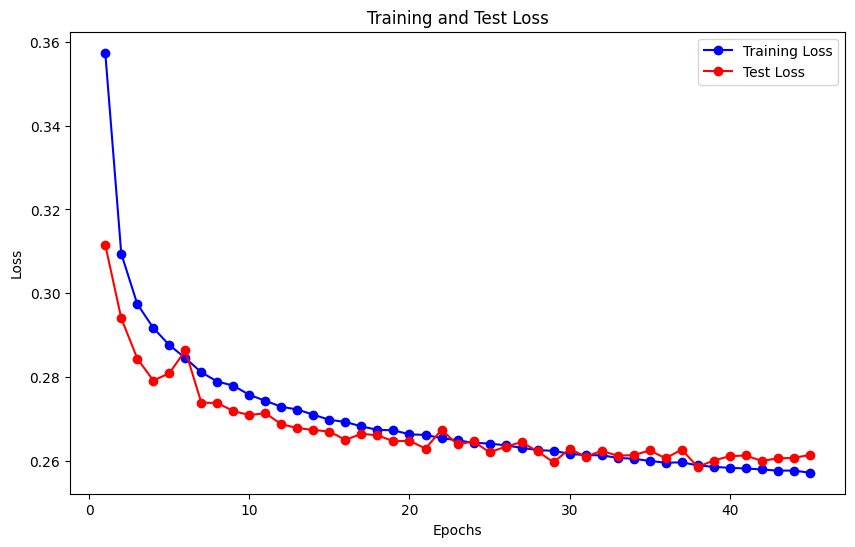

In [38]:
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
plt.plot(epochs, test_losses, 'ro-', label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
from torcheval.metrics.functional import binary_f1_score

# Now, calculate the F1 score using the concatenated results
f1 = binary_f1_score(all_pred_labels, all_true_labels)
print(f"F1 Score: {f1.item():.4f}")

F1 Score: 0.8817


# Submission

Pre Process the test set

In [41]:
output = pd.DataFrame({'id': test_ids, 'Exited': predictions_np})

In [42]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
